# Deep Music Genre

In [19]:
import os
import pickle

import IPython
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We already have the MFCC preprocessed songs. Let's see them.

In [16]:
GTZAN_ROOT = 'datasets/genres'
GTZAN_GENRES = os.listdir(GTZAN_ROOT)

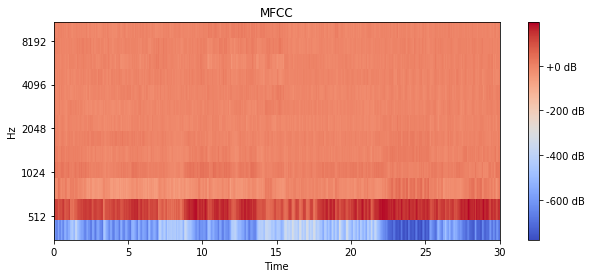

In [53]:
with open(os.path.join(GTZAN_ROOT, 'jazz/jazz.00000.pickle'), 'rb') as f:
    mfcc = pickle.load(f)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    #plt.tight_layout()

(128, 1293)


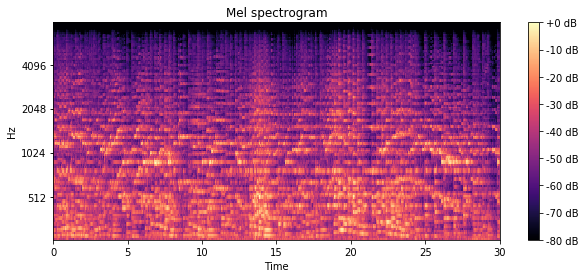

In [96]:
F = 'datasets/genres/classical/classical.00000.au'
y, sr = librosa.load(F, mono=True)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
print(S.shape)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
#plt.tight_layout()

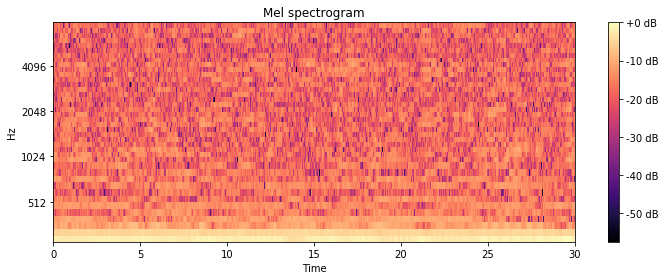

In [67]:
y, sr = librosa.load(F, mono=True)
S = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

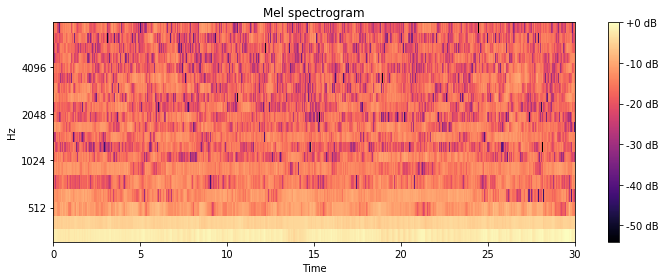

In [83]:
y, sr = librosa.load(F, mono=True)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S = librosa.feature.mfcc(S=librosa.power_to_db(S))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [91]:
featuresArray = []
SOUND_SAMPLE_LENGTH = 30000

HAMMING_SIZE = 100
HAMMING_STRIDE = 40
for i in range(0, SOUND_SAMPLE_LENGTH, HAMMING_STRIDE):
    if i + HAMMING_SIZE <= SOUND_SAMPLE_LENGTH - 1:
        y, sr = librosa.load(F, offset=i / 1000.0, duration=HAMMING_SIZE / 1000.0)

        # Let's make and display a mel-scaled power (energy-squared) spectrogram
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

        # Convert to log scale (dB). We'll use the peak power as reference.
        log_S = librosa.power_to_db(S, ref=np.max)

        #mfcc = librosa.feature.mfcc(S=log_S, sr=sr, n_mfcc=13)
        featuresArray.append(mfcc)

        if len(featuresArray) == 599:
            break

print(len(featuresArray), featuresArray[0].shape)

KeyboardInterrupt: 